# Exploratory Data Analysis of RePEc Tweets

This notebook aims to perform an exploratory data analysis (EDA) on a dataset containing tweets related to the Research Papers in Economics (RePEc) database. Our focus is to understand the dataset's structure, distribution of tweet metrics, and any insights into the tweeting behavior of RePEc-related content.

## Dataset Schema

The dataset includes the following columns:
- `RePEc_id`: Identifier related to the RePEc database.
- `author_id`: Unique identifier of the tweet's author.
- `id`: Unique identifier of the tweet.
- `text`: Text content of the tweet.
- `created_at`: Creation date and time of the tweet.
- `retweet_count`, `reply_count`, `like_count`, `quote_count`: Engagement metrics.
- `impression_count`: View count of the tweet.
- `referenced_id`, `referenced_type`: Information on referenced tweets or content.
- `lang`: Language of the tweet.

## Objectives

1. Understand the basic structure and content of the dataset.
2. Analyze the distribution of engagement metrics (likes, retweets, etc.).
3. Explore the tweeting patterns over time.

**Author: Eric Uehling**  
*Date: 2.20.24*


## Loading the Data

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/csv/cleaned_RePEc_tweets.csv', dtype={'referenced_id': str, 'id': str, 'author_id': str})

df.head()

C:\Users\Eric\AppData\Local\Temp\ipykernel_17700\1047523811.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/csv/cleaned_RePEc_tweets.csv', dtype={'referenced_id': str, 'id': str, 'author_id': str})


,RePEc_id,author_id,id,text,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,referenced_id,referenced_type,lang
0,pal276,766166816922173440,1636234884212506625,Climate Spiral (1880-2022) – Climate Change #C...,2023-03-16 05:16:10+00:00,0,0,0,0,18.0,NaN,own,fr
1,pal276,766166816922173440,1635542184387842048,"""Assessment of the Shari’ah Requirements in th...",2023-03-14 07:23:38+00:00,0,0,1,0,14.0,NaN,own,en
2,pal276,766166816922173440,1635539997033119744,"""Implementation of Corporate Governance Princi...",2023-03-14 07:14:56+00:00,0,0,0,0,14.0,NaN,own,en
3,pal276,766166816922173440,1635536943521095680,"""The Dynamic Link Between Islamic and Conventi...",2023-03-14 07:02:48+00:00,0,0,0,0,21.0,NaN,own,en
4,pal276,766166816922173440,1635534446593200129,"""World Energy Economics and Geopolitics amid C...",2023-03-14 06:52:53+00:00,0,0,0,0,11.0,NaN,own,en


In [18]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165665 entries, 0 to 5165664
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RePEc_id          object 
 1   author_id         object 
 2   id                object 
 3   text              object 
 4   created_at        object 
 5   retweet_count     int64  
 6   reply_count       int64  
 7   like_count        int64  
 8   quote_count       int64  
 9   impression_count  float64
 10  referenced_id     object 
 11  referenced_type   object 
 12  lang              object 
dtypes: float64(1), int64(4), object(8)
memory usage: 512.3+ MB


## Basic Statistical Overview

After loading the data, we perform a basic statistical analysis to understand the numerical columns' distribution.

In [19]:
# Basic statistics of numerical columns
df.describe()

,retweet_count,reply_count,like_count,quote_count,impression_count
count,5.165665e+06,5.165665e+06,5.165665e+06,5.165665e+06,4.763680e+05
mean,3.785083e+02,8.543651e-01,1.339264e+01,3.009212e-01,2.742415e+03
std,8.175175e+03,1.490361e+01,3.542079e+02,1.278928e+01,4.762967e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.800000e+01
75%,8.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,7.210000e+02
max,3.013873e+06,8.442000e+03,1.930130e+05,1.318800e+04,1.591398e+07


## Time Series Analysis of Tweets

Understanding how tweeting behavior changes over time can provide insights into patterns or specific events that triggered increased activity. We'll examine how the volume of tweets and engagement metrics evolve over time.

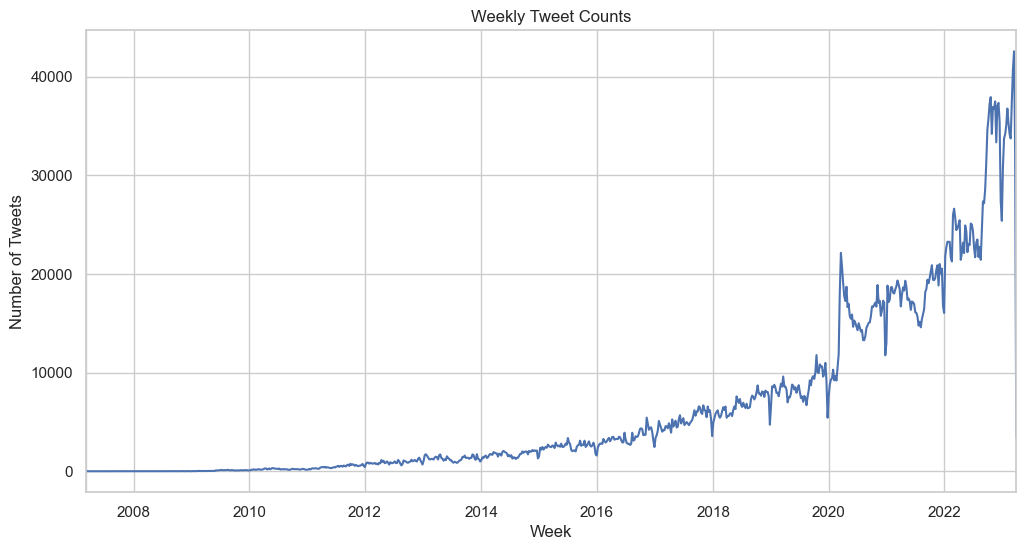

In [20]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Resampling to a weekly basis and counting tweets
weekly_tweets = df.resample('W', on='created_at').size()

# Plotting the time series of tweet counts
plt.figure(figsize=(12, 6))
weekly_tweets.plot(title='Weekly Tweet Counts')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

## Grouping Data by Referenced Type
In this section, we'll analyze the dataset by grouping data based on the `referenced_type` column. This will allow us to explore the interactions with different types of referenced content, such as original tweets, replies, retweets, or quotes. Understanding these interactions can provide insights into how users engage with RePEc-related content on Twitter.

### Analyzing Tweet Counts by Referenced Type
First, let's examine the distribution of tweets based on their referenced type.

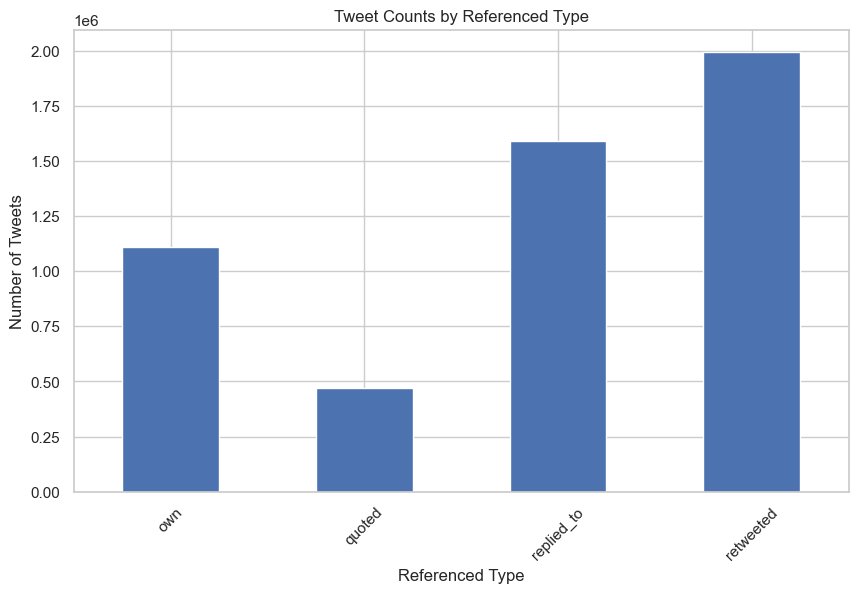

In [21]:
# Counting tweets by referenced type
tweet_counts_by_type = df.groupby('referenced_type').size()

# Plotting the distribution
plt.figure(figsize=(10, 6))
tweet_counts_by_type.plot(kind='bar')
plt.title('Tweet Counts by Referenced Type')
plt.xlabel('Referenced Type')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

### Engagement Metrics by Referenced Type
Next, we'll explore the engagement metrics (like counts, retweet counts, reply counts, and quote counts) for each referenced type. This analysis will help us understand which types of interactions are most engaging for the audience.

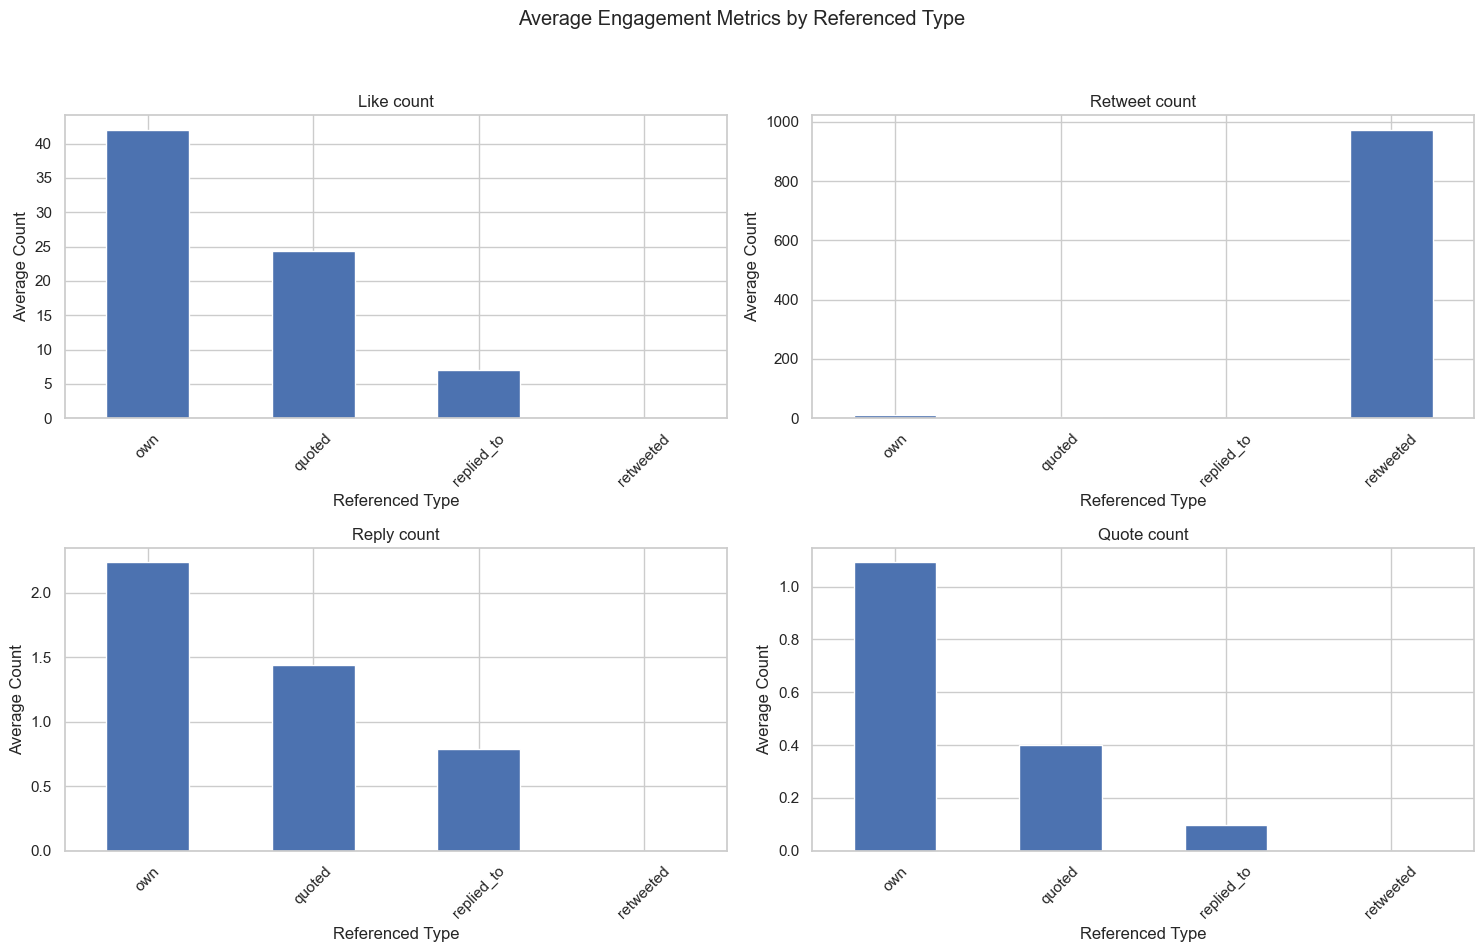

In [22]:
# Correcting the aggregation of engagement metrics by referenced type
engagement_metrics_by_type = df.groupby('referenced_type')[['like_count', 'retweet_count', 'reply_count', 'quote_count']].mean()

# Plotting the engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Average Engagement Metrics by Referenced Type')

metrics = ['like_count', 'retweet_count', 'reply_count', 'quote_count']
for ax, metric in zip(axes.flatten(), metrics):
    engagement_metrics_by_type[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric.capitalize().replace('_', ' '))
    ax.set_xlabel('Referenced Type')
    ax.set_ylabel('Average Count')
    ax.set_xticklabels(engagement_metrics_by_type.index, rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # type: ignore
plt.show()


### Tweeting Patterns Over Time by Referenced Type
Lastly, we'll examine how tweeting patterns vary over time for different types of referenced content. This will help us understand temporal trends in user engagement with RePEc-related tweets.

<Figure size 1200x600 with 0 Axes>

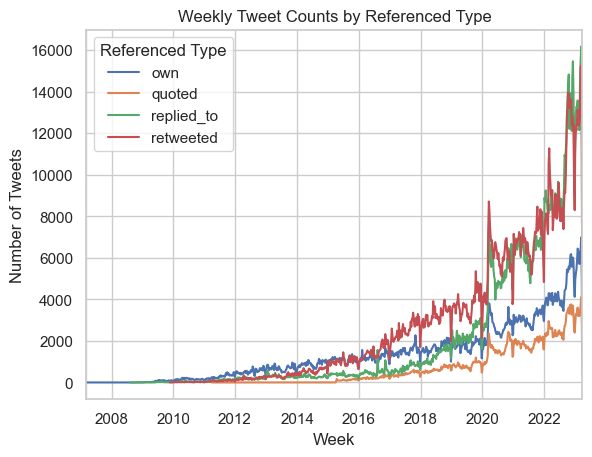

In [23]:
# Resampling to a weekly basis and counting tweets by referenced type
weekly_tweets_by_type = df.groupby('referenced_type').resample('W', on='created_at').size().unstack(0) # type: ignore

# Plotting the time series of tweet counts by referenced type
plt.figure(figsize=(12, 6))
weekly_tweets_by_type.plot()
plt.title('Weekly Tweet Counts by Referenced Type')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.legend(title='Referenced Type')
plt.show()

## Analyzing Engagement Metrics

Engagement metrics such as like count, retweet count, reply count, and quote count offer insights into the popularity and reach of tweets. Let's analyze their distributions and identify any patterns or outliers. We will filter for original tweets, as retweeted tweets have different engagement rules.

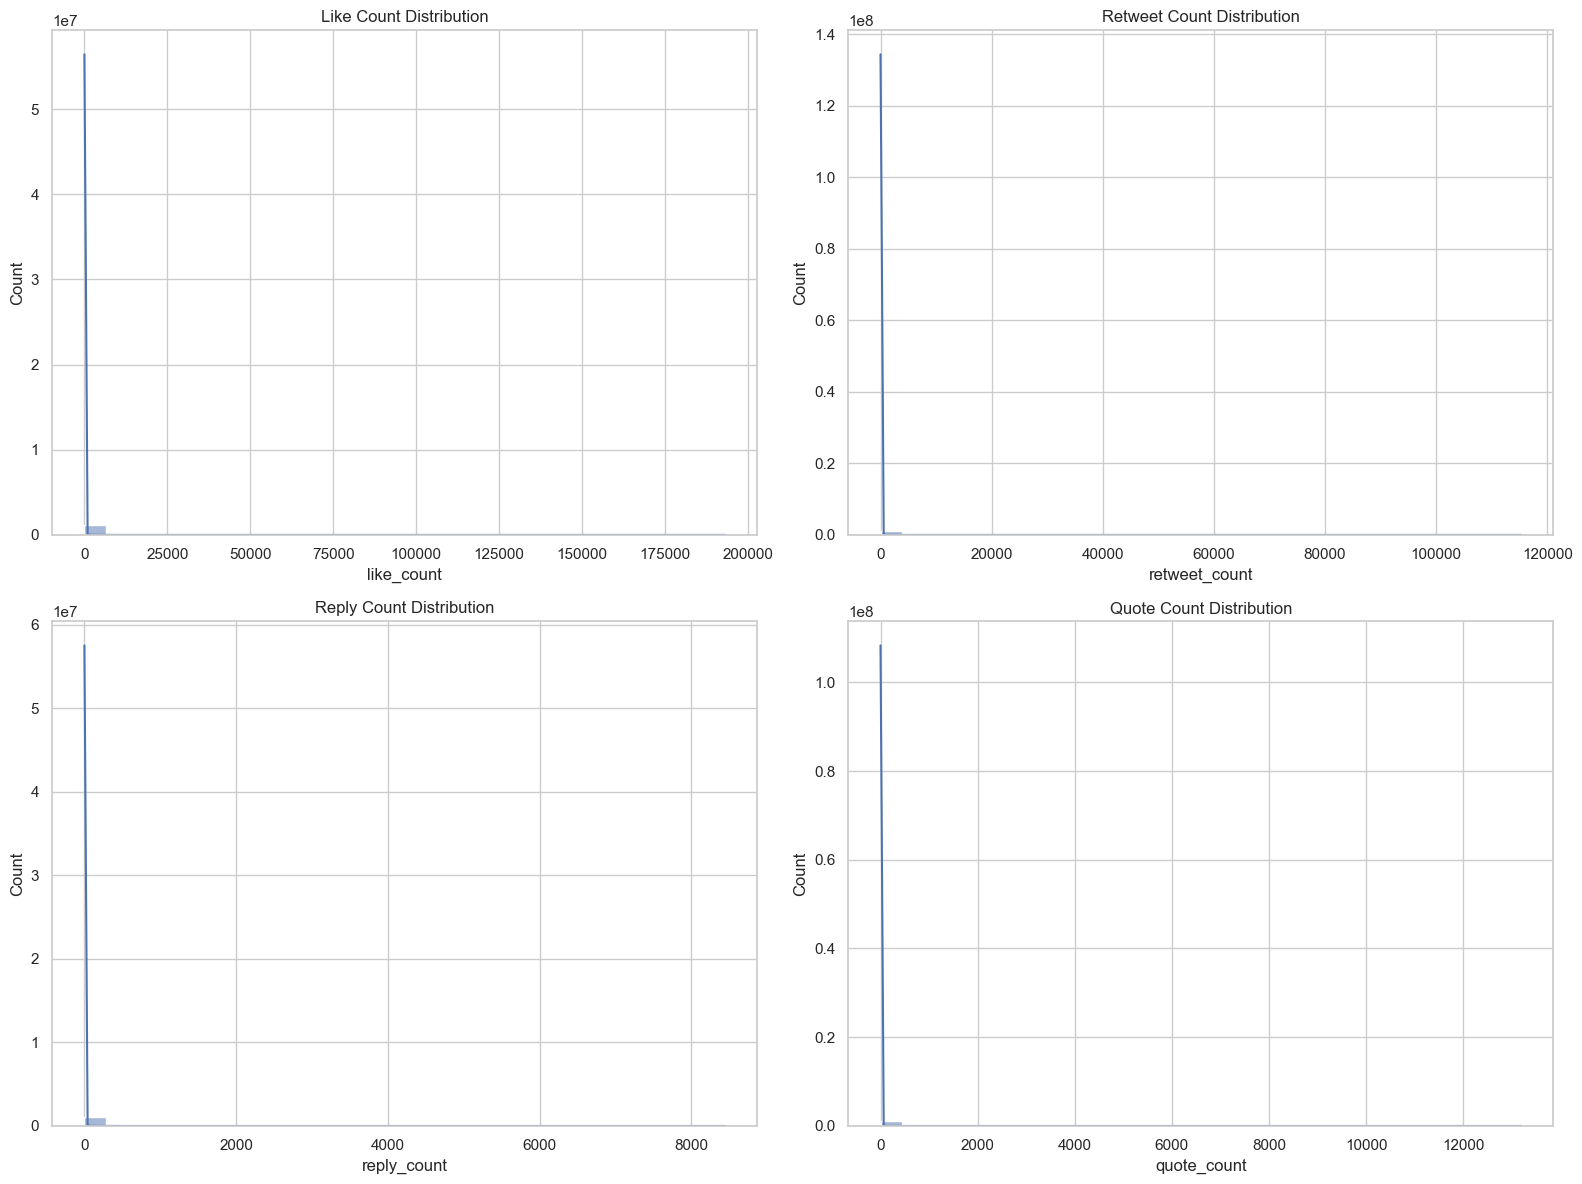

In [24]:
original_tweets = df[df['referenced_type'] == 'own'].copy()

# Set up the visualization library
sns.set(style="whitegrid")

# Visualization of engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(original_tweets['like_count'], bins=30, ax=axes[0, 0], kde=True).set(title='Like Count Distribution')
sns.histplot(original_tweets['retweet_count'], bins=30, ax=axes[0, 1], kde=True).set(title='Retweet Count Distribution')
sns.histplot(original_tweets['reply_count'], bins=30, ax=axes[1, 0], kde=True).set(title='Reply Count Distribution')
sns.histplot(original_tweets['quote_count'], bins=30, ax=axes[1, 1], kde=True).set(title='Quote Count Distribution')

plt.tight_layout()

## Transformation and Distribution of Engagement Metrics

Given the right-skewed nature of our engagement metrics, we will apply a logarithmic transformation to these variables to reduce the impact of extreme values. This transformation will allow us to better visualize and understand the distribution of these metrics.

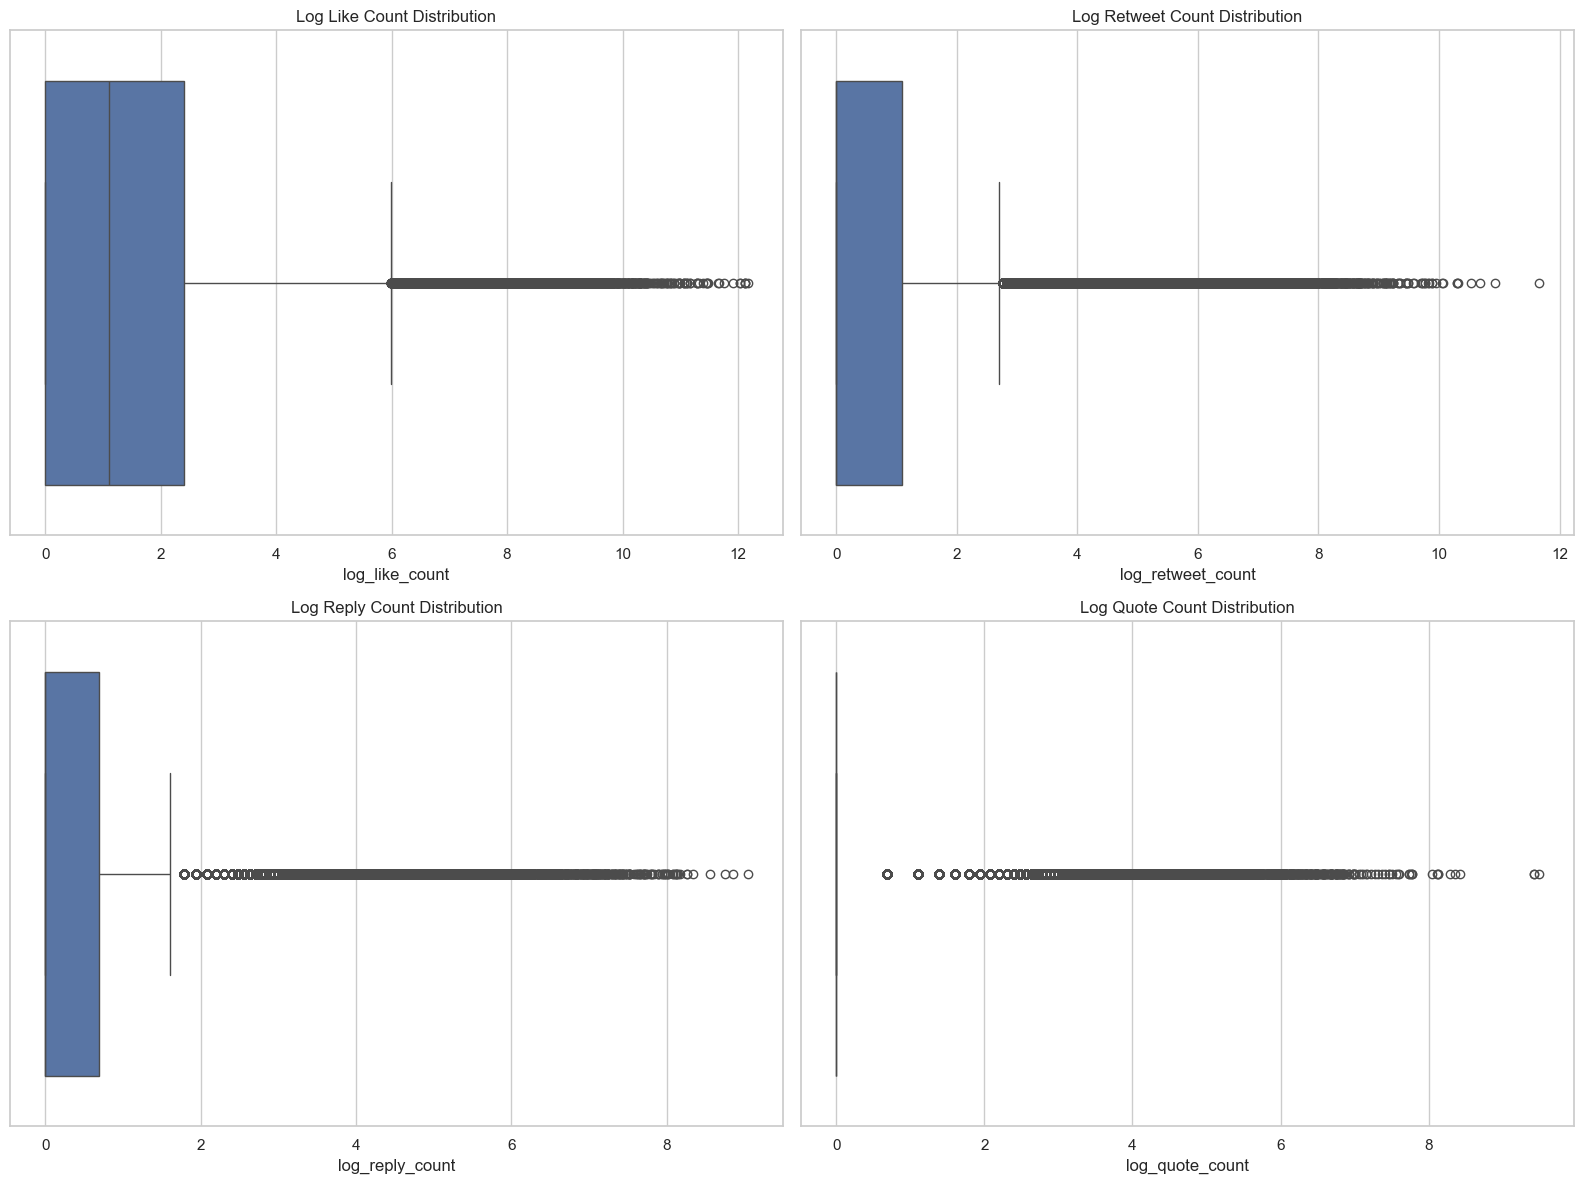

In [25]:
# Log transformation of the count variables
# We use log1p which is more appropriate for counts since it handles zero counts.
original_tweets['log_like_count'] = np.log1p(original_tweets['like_count'])
original_tweets['log_retweet_count'] = np.log1p(original_tweets['retweet_count'])
original_tweets['log_reply_count'] = np.log1p(original_tweets['reply_count'])
original_tweets['log_quote_count'] = np.log1p(original_tweets['quote_count'])

# Visualization of log-transformed engagement metrics using boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x=original_tweets['log_like_count'], ax=axes[0, 0]).set(title='Log Like Count Distribution')
sns.boxplot(x=original_tweets['log_retweet_count'], ax=axes[0, 1]).set(title='Log Retweet Count Distribution')
sns.boxplot(x=original_tweets['log_reply_count'], ax=axes[1, 0]).set(title='Log Reply Count Distribution')
sns.boxplot(x=original_tweets['log_quote_count'], ax=axes[1, 1]).set(title='Log Quote Count Distribution')

plt.tight_layout()

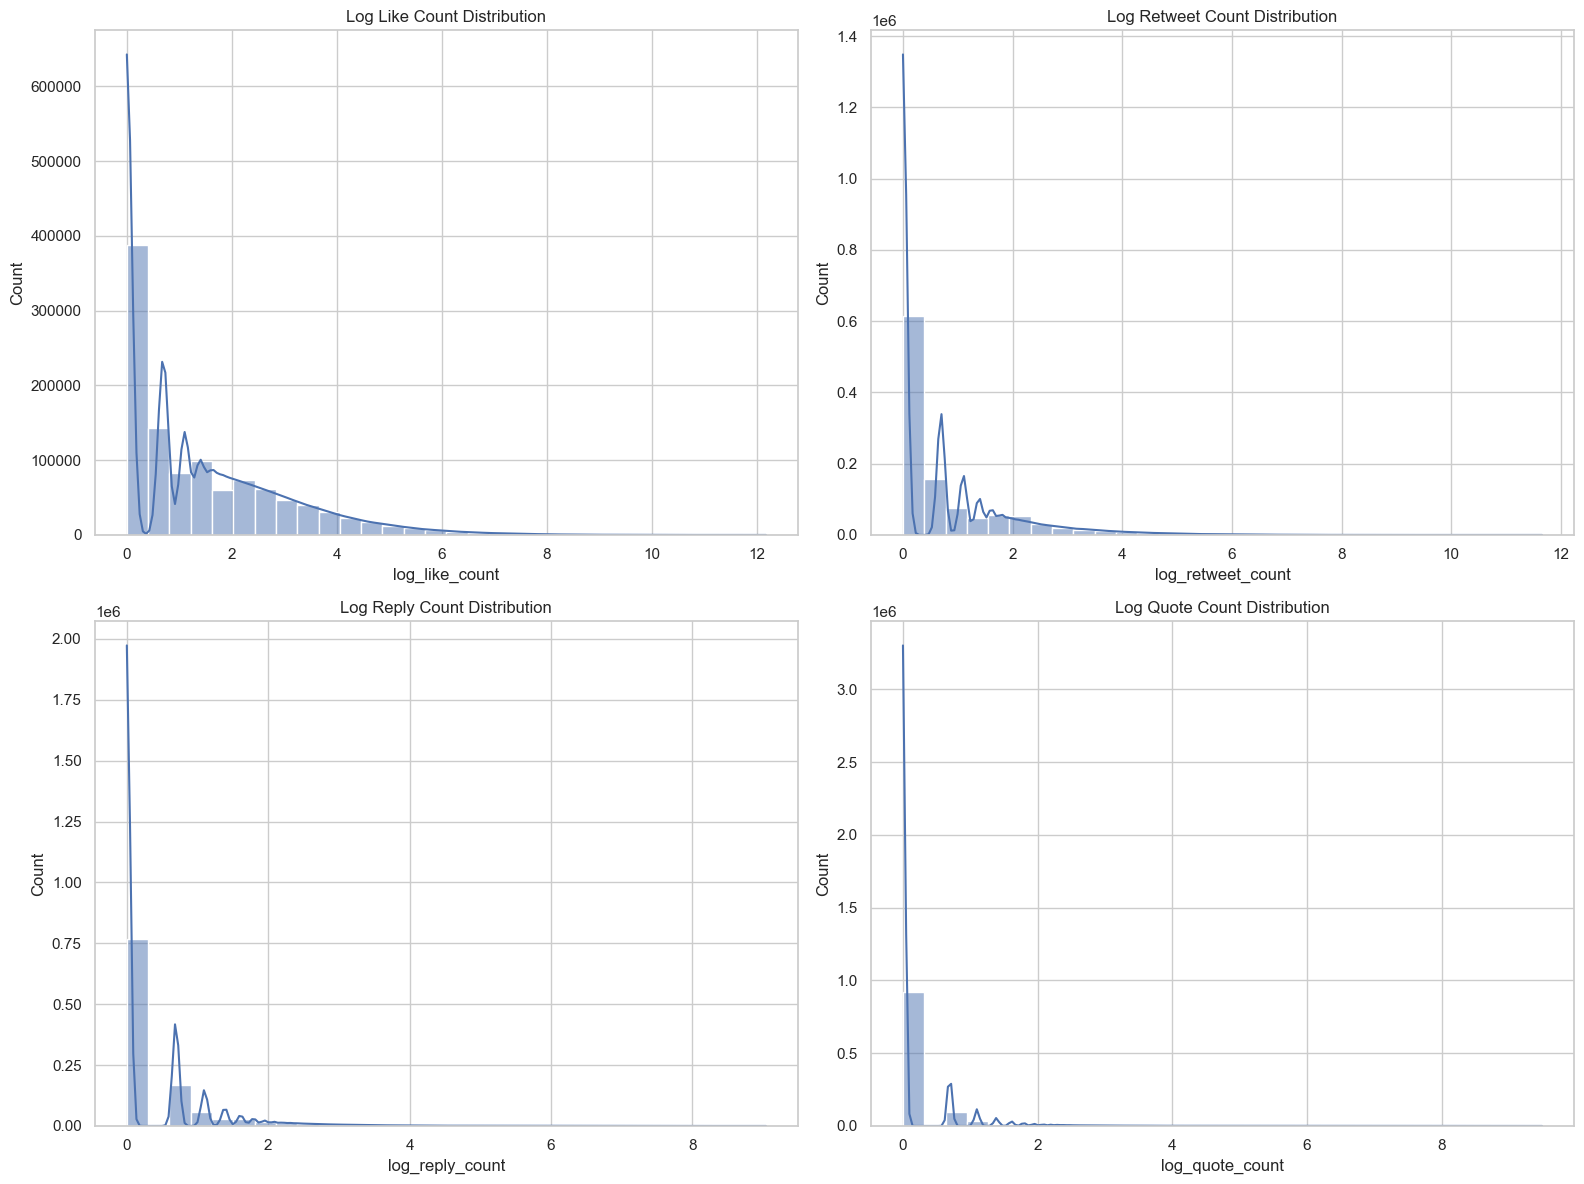

In [26]:
# Visualization of log-transformed engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(original_tweets['log_like_count'], bins=30, ax=axes[0, 0], kde=True).set(title='Log Like Count Distribution')
sns.histplot(original_tweets['log_retweet_count'], bins=30, ax=axes[0, 1], kde=True).set(title='Log Retweet Count Distribution')
sns.histplot(original_tweets['log_reply_count'], bins=30, ax=axes[1, 0], kde=True).set(title='Log Reply Count Distribution')
sns.histplot(original_tweets['log_quote_count'], bins=30, ax=axes[1, 1], kde=True).set(title='Log Quote Count Distribution')

plt.tight_layout()

## Interpreting the Log-Transformed Distributions

The log transformation has allowed us to reduce the skewness of the engagement metrics, revealing more about their underlying distribution. With these normalized distributions, we can observe the following:

- The median and interquartile range (IQR) for each metric.
- The presence and impact of outliers beyond the whiskers of the boxplots.
- Any potential differences between the metrics in terms of engagement.

## Correlation Analysis

Investigating the relationships between the different engagement metrics can provide insights into how these metrics influence each other. For example, we might find that tweets with more likes also tend to have more retweets.

### Heatmap of Correlation Between Engagement Metrics

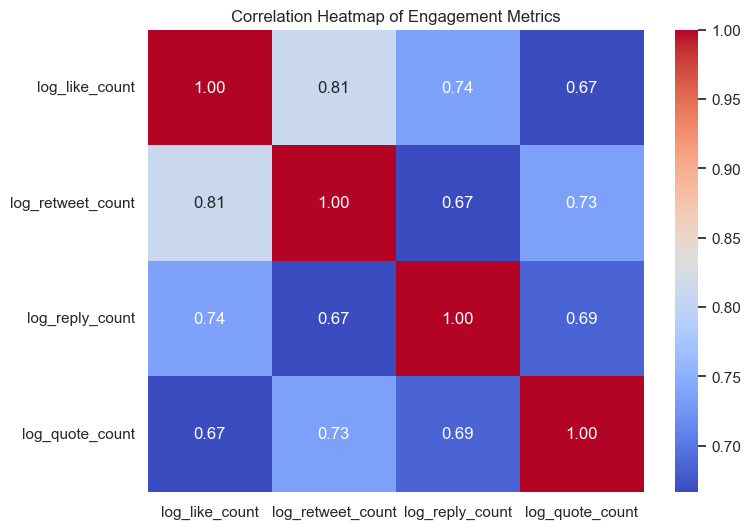

In [27]:
# Calculate the correlation matrix for log-transformed engagement metrics
engagement_metrics = ['log_like_count', 'log_retweet_count', 'log_reply_count', 'log_quote_count']
corr_matrix = original_tweets[engagement_metrics].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

## Engagement by Time Analysis

To understand when tweets receive the most engagement, we can analyze the tweet data to find patterns related to the time of posting. We'll look at two aspects:

1. The hour of the day when tweets are posted and their engagement levels.
2. The day of the week when tweets are posted and their engagement levels.

This can help in identifying optimal times for posting to achieve higher engagement.

### Engagement Based on Hour of Day

<Figure size 1400x700 with 0 Axes>

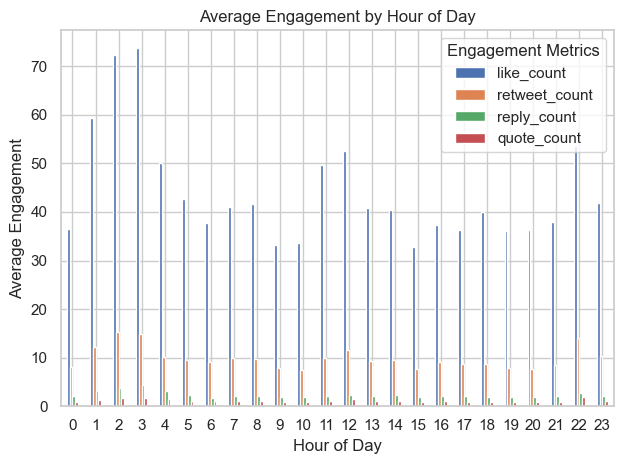

In [28]:
# Extract hour of day and day of week from 'created_at'
original_tweets['hour_of_day'] = original_tweets['created_at'].dt.hour
original_tweets['day_of_week'] = original_tweets['created_at'].dt.day_name()

# Group by hour of day and calculate the mean engagement metrics
hourly_engagement = original_tweets.groupby('hour_of_day')[['like_count', 'retweet_count', 'reply_count', 'quote_count']].mean()

# Plotting the engagement metrics by hour of day
plt.figure(figsize=(14, 7))
hourly_engagement.plot(kind='bar')
plt.title('Average Engagement by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.legend(title='Engagement Metrics')
plt.tight_layout()
plt.show()

### Engagement Based on Day of Week

<Figure size 1400x700 with 0 Axes>

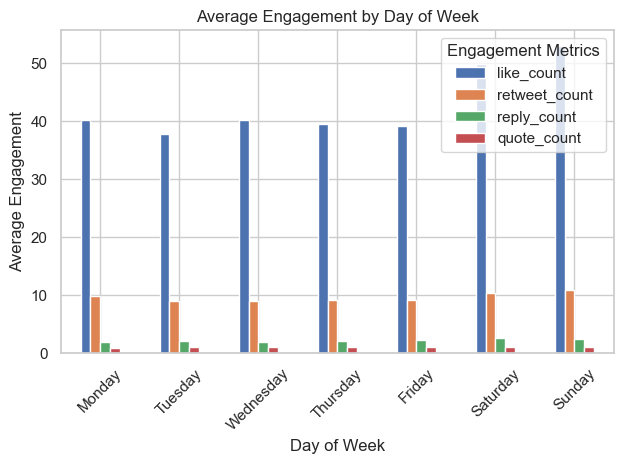

In [29]:
# Group by day of week and calculate the mean engagement metrics
daily_engagement = original_tweets.groupby('day_of_week')[['like_count', 'retweet_count', 'reply_count', 'quote_count']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the engagement metrics by day of week
plt.figure(figsize=(14, 7))
daily_engagement.plot(kind='bar')
plt.title('Average Engagement by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metrics')
plt.tight_layout()
plt.show()

## Language Distribution of Tweets

Understanding the language distribution can give us insights into the geographical and cultural reach of the RePEc content. Let's examine the number of tweets per language.

### Count of Tweets by Language

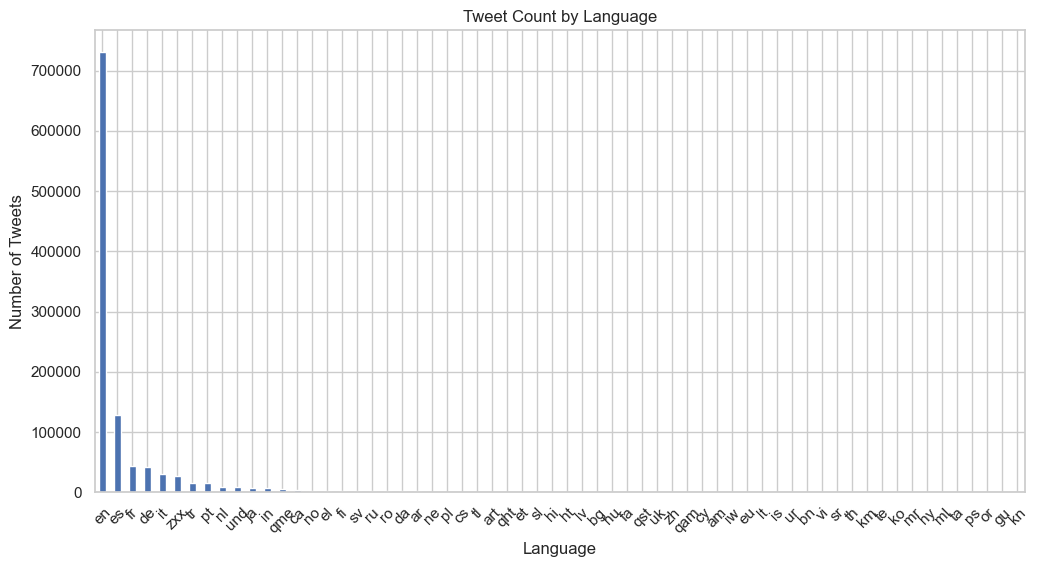

In [30]:
# Count of tweets by language
language_counts = original_tweets['lang'].value_counts()

# Plotting the distribution of tweets by language
plt.figure(figsize=(12, 6))
language_counts.plot(kind='bar')
plt.title('Tweet Count by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

## Analysis of Top Tweets

Identifying the tweets that received the highest engagement can help us understand what type of content resonates with the audience.

### Tweets with Highest Like Counts

In [32]:
# Display the top 5 tweets with the highest like counts
top_likes = original_tweets.nlargest(5, 'like_count')
top_likes[['RePEc_id', 'created_at', 'text', 'retweet_count', 'like_count', 'reply_count', 'quote_count']]

,RePEc_id,created_at,text,retweet_count,like_count,reply_count,quote_count
2125137,NaN,2020-05-31 08:21:36+00:00,This country was infinity more prepared to go ...,55353,193013,310,1090
4749017,NaN,2022-02-02 22:11:27+00:00,WTF is going on in Pittsburgh?? https://t.co/N...,22958,184345,1018,2335
4684496,NaN,2020-11-19 12:26:12+00:00,"Admit it, THIS is the ONLY reason you are on @...",43272,183142,2987,13188
2085869,NaN,2021-10-19 12:09:04+00:00,このスポーツ開発した人もしや天才というやつでは https://t.co/KFFfsRybVS,37608,182975,359,3124
2019142,pva219,2020-02-01 11:44:52+00:00,#Coronavirus On a train in Italy. A teenage Ch...,29875,167441,1136,1742
